In [9]:
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

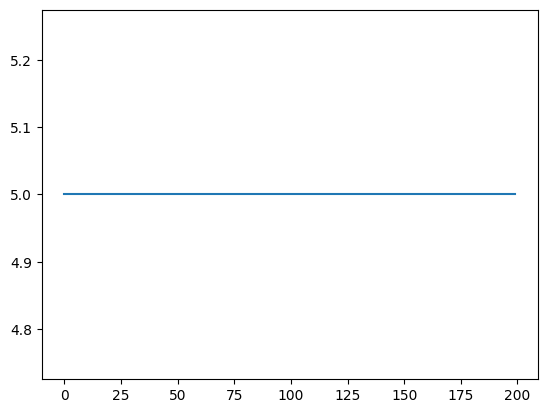

In [10]:
def stable_data_generator(mean, seq_length):
    data = [mean] * seq_length
    return data

mean = 5 
seq_length = 200
data = stable_data_generator(mean, seq_length)
plt.plot(data)



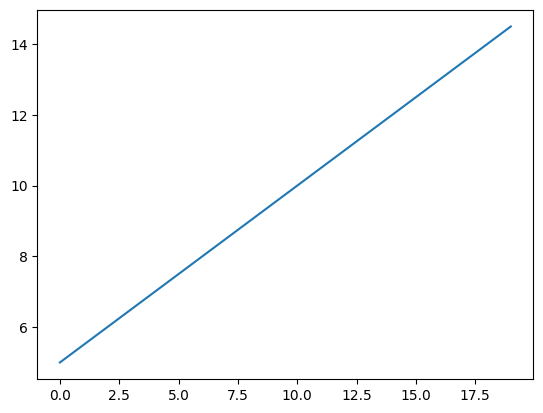

In [11]:
def linear_data_generator(slope,start, seq_length):
        
    end = start + seq_length 
    x = [start] * seq_length
    #print((x))
    for i in range(len(x)):
        x[i] = i*slope + start
        
    #print(x)
    return x

slope = 0.5
start = 5
seq_length = 20

lin_data = linear_data_generator(slope,start, seq_length)
plt.plot(lin_data)
    

In [12]:
def awgn_generator(data,std_dev ):
    noise = np.random.normal(0, std_dev, len(data))
    return noise

[4.74283378611915, 5.411090909453534, 4.907270743885368, 5.856663270690594, 5.69990527878541, 5.667461750639407, 4.473147470721037, 5.501324261629403, 5.05241613579347, 4.518449510853278, 4.833111592996348, 5.651361627890111, 4.118446966675634, 4.6505731233343495, 4.798169914523612, 6.168086277645048, 4.306207677943725, 5.43530286238769, 5.503072585451184, 5.130937289965792, 4.846542382559795, 5.295864131860923, 4.368447502272124, 4.988789088117474, 4.33859105411401, 5.022441491956694, 5.641726028700935, 4.829610943005864, 4.7247329424571705, 4.543741022223952, 4.4946100189737255, 4.339057131350646, 5.3209881765127784, 5.455893588908099, 4.560017021753392, 4.982791619608334, 4.740003541251382, 4.637111176195913, 5.535853035564994, 4.808818738700981, 5.489175058255031, 4.550282558419171, 5.866106918133644, 5.196579359459369, 4.902561100075708, 4.985517526858224, 5.610233461559573, 4.712641137044206, 4.5064564840451276, 5.172245960183089, 5.278160529629477, 5.496423885671237, 5.806709164

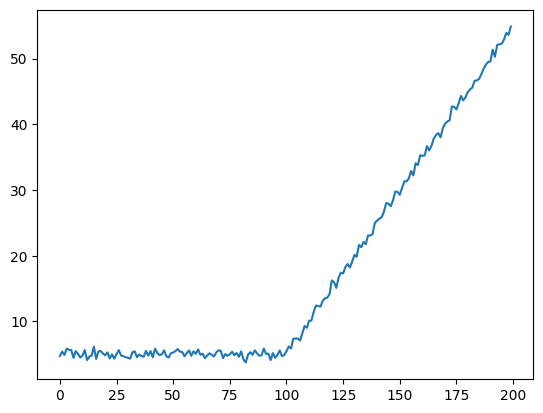

In [13]:
data = stable_data_generator(5,100)
data.extend(linear_data_generator(0.5,5,100))

noise = awgn_generator(data, 0.5)
for i in range(len(data)):
    data[i] += noise[i]
print(data)
plt.plot(data)

5.278160529629477
15.306665535925482


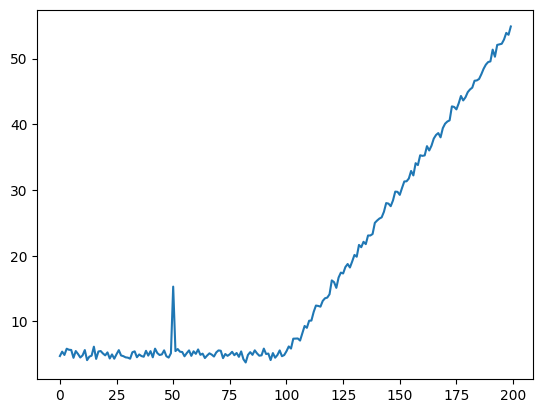

In [14]:
def instant_change(data, idx, percent_change):
    data[idx] = data[idx] * (1 + percent_change)
    
print(data[50])
instant_change(data, 50 , 1.9)
print(data[50])
plt.plot(data)

In [15]:
#def create_random_data(num_stab,num_lin,num_inst):
#    stab = [0] * num_stab
#    lin = [1] * num_lin
#    stab.extend(lin) 
#    data = []
#    while 1 in stab or 0 in stab:
#        rand_ind = np.random.randint(0,len(stab) -1 )
#        rand_elem = stab[rand_ind]
#        if rand_elem == 0:
#            cur_data = stable_data_generator(5,100)
#            data.extend(cur_data)
#            stab[rand_ind] = -1
#        if rand_elem== 1 :
#            cur_data = linear_data_generator(1, 5, 100)
#            stab[rand_ind] = -1
#            data.extend(cur_data)
            
#        if rand_elem == -1:
#            continue
        
#    print(stab)
#    return data


#new_data = create_random_data(3,4,5)
#plt.plot(new_data)

our random array is: [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]
data now is: [1.0, 1.4657047452264758, 1.9314094904529513, 2.397114235679427, 2.8628189809059026, 3.3285237261323783, 3.7942284713588537, 4.259933216585329, 4.725637961811805, 5.191342707038281, 5.657047452264757, 6.1227521974912325, 6.588456942717707, 7.054161687944183, 7.519866433170659, 7.985571178397135, 8.45127592362361, 8.916980668850087]
data now is: [1.0, 1.4657047452264758, 1.9314094904529513, 2.397114235679427, 2.8628189809059026, 3.3285237261323783, 3.7942284713588537, 4.259933216585329, 4.725637961811805, 5.191342707038281, 5.657047452264757, 6.1227521974912325, 6.588456942717707, 7.054161687944183, 7.519866433170659, 7.985571178397135, 8.45127592362361, 8.916980668850087, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 0.009980306514116077, 

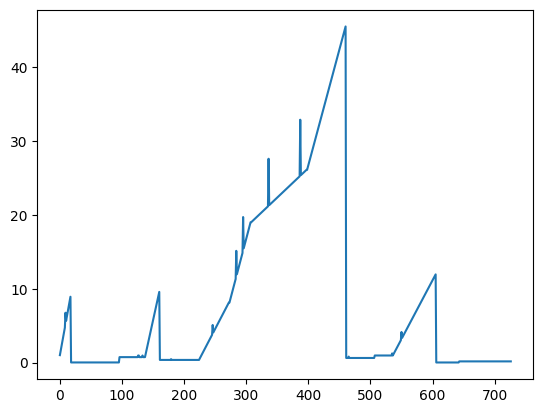

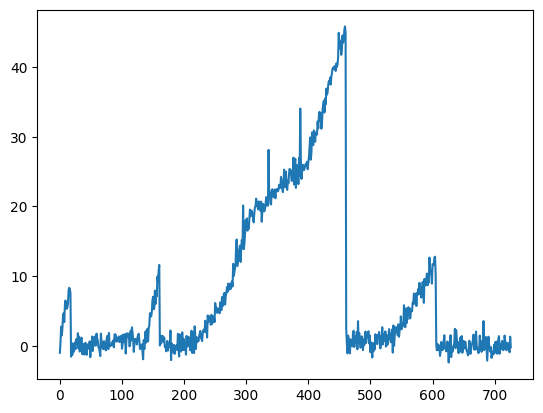

In [31]:
def create_random_array(num_zeros,num_ones):
    total_elements = num_zeros + num_ones
    
    zeros = [0] * num_zeros
    ones = [1] * num_ones
    random_array = zeros + ones
    
    np.random.shuffle(random_array)
    print(f"our random array is: {random_array}")
    
    return random_array

def create_random_data_easy(array, num_inst, stab_upper_bound, linear_upper_bound,change_percent):
    data = []
    labels= []
    for i in range(len(array)):
        if array[i] == 0 :
            # data.append(np.random.randint(0,3))

            mean = np.random.uniform(0,stab_upper_bound)
            seq_length = np.random.randint(0,100)
            cur_data = stable_data_generator(mean, seq_length)
            data.extend(cur_data)
            # print(f"current data to append {cur_data}")

            for i in range (seq_length):
                labels.append('Stable')
                
        else:
            length = len(data)
            if length == 0 :
                start = np.random.randint(0,3)
            else:
                start = data[length -1]
                
                
            slope = np.random.uniform(0,linear_upper_bound)
    
            seq_length = np.random.randint(0,100)
            cur_data = linear_data_generator(slope,start,seq_length)
            data.extend(cur_data)
            # print(f"current data to append {cur_data}")
            for i in range(seq_length):  
                labels.append('Linear')
        print(f"data now is: {data}")
    
    rand_ind = np.random.randint(0,len(data),num_inst)
    print(f"instant changes are at: {rand_ind}")
    for i in rand_ind:  
        data[i] = data[i] * (1  + change_percent)
    
    df = pd.DataFrame()
    df['Data'] = data
    df['Labels'] = labels
    
    return df



array = create_random_array(7,7)

df = create_random_data_easy(array,15,1,0.5, 0.3)
data = df['Data']
data = np.array(data)
plt.plot(data)
plt.show()
noise = awgn_generator(data, 1)
for i in range(len(data)):
    data[i] += noise[i]



plt.plot(data)

